## Malignant Comments Classifier Project

### Problem Statement

The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection. Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.
There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.
Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive. Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying.

### Dataset Description

The data set contains the training set, which has approximately 1,59,000 samples and the test set which contains nearly 1,53,000 samples. All the data samples contain 8 fields which includes ‘Id’, ‘Comments’, ‘Malignant’, ‘Highly malignant’, ‘Rude’, ‘Threat’, ‘Abuse’ and ‘Loathe’. 
The label can be either 0 or 1, where 0 denotes a NO while 1 denotes a YES. There are various comments which have multiple labels. The first attribute is a unique ID associated with each comment.   


#### The data set includes:

-	Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not. 
-	Highly Malignant: It denotes comments that are highly malignant and hurtful. 
-	Rude: It denotes comments that are very rude and offensive.
-	Threat: It contains indication of the comments that are giving any threat to someone. 	
-	Abuse: It is for comments that are abusive in nature. 
-	Loathe: It describes the comments which are hateful and loathing in nature.  
-	ID: It includes unique Ids associated with each comment text given.   
-	Comment text: This column contains the comments extracted from various social media platforms. 

This project is more about exploration, feature engineering and classification that can be done on this data. Since the data set is huge and includes many categories of comments, we can do good amount of data exploration and derive some interesting features using the comments text column available.

You need to build a model that can differentiate between comments and its categories.

In [204]:
# Importing libraries and necessary libraries

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import missingno
import pandas_profiling
from scipy import interp
import scikitplot as skplt
from itertools import cycle
import matplotlib.ticker as plticker

import nltk
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize, regexp_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from scipy.sparse import csr_matrix

import timeit, sys
from sklearn import metrics
import tqdm.notebook as tqdm
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.svm import SVC, LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.metrics import hamming_loss, log_loss, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score, multilabel_confusion_matrix
from scikitplot.metrics import plot_roc_curve

import warnings
warnings.simplefilter("ignore")
warnings.filterwarnings("ignore")

import joblib

In [205]:
# importing dataset
df_train= pd.read_csv(r'..//train.csv')

In [206]:
df_train

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0


Looking into our training dataset, we can see that it has 1,59,571 rows and 8 columns. The id column is unimportant to us, however the comment column aids us in labelling the remaining columns in binary labels.

In [207]:
# importing test dataset
df_test= pd.read_csv(r'..//test.csv')

In [208]:
df_test

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.
...,...,...
153159,fffcd0960ee309b5,". \n i totally agree, this stuff is nothing bu..."
153160,fffd7a9a6eb32c16,== Throw from out field to home plate. == \n\n...
153161,fffda9e8d6fafa9e,""" \n\n == Okinotorishima categories == \n\n I ..."
153162,fffe8f1340a79fc2,""" \n\n == """"One of the founding nations of the..."


When we look at the testing dataset after looking through the training data, we observe that there are 1,53,164 rows and only 2 columns in this dataframe. This leads us to believe that we'll need to add more columns to our spreadsheet to categorise the comments based on our model's confidence. The id column, once again, does not appear to be of any use and may be eliminated.

## Exploratory Data Analysis (EDA)

In [209]:
print("We have {} Rows & {} Columns in our dataframe".format(df_train.shape[0], df_train.shape[1]))
df_train.head(20)

We have 159571 Rows & 8 Columns in our dataframe


,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


Our training dataframe has a total of 159571 rows and 8 columns, as can be seen.

Column Description:

- id : A unique id aligned with each comment text.
- comment_text : It includes the comment text.
- malignant : It is a column with binary values depicting which comments are malignant in nature.
- highly_malignant : Binary column with labels for highly malignant text.
- rude : Binary column with labels for comments that are rude in nature.
- threat : Binary column with labels for threatening context in the comments.
- abuse : Binary column with labels with abusive behaviour.
- loathe : Label to comments that are full of loathe and hatred.

In [210]:
# checking for missing values
df_train.isna().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

<AxesSubplot:>

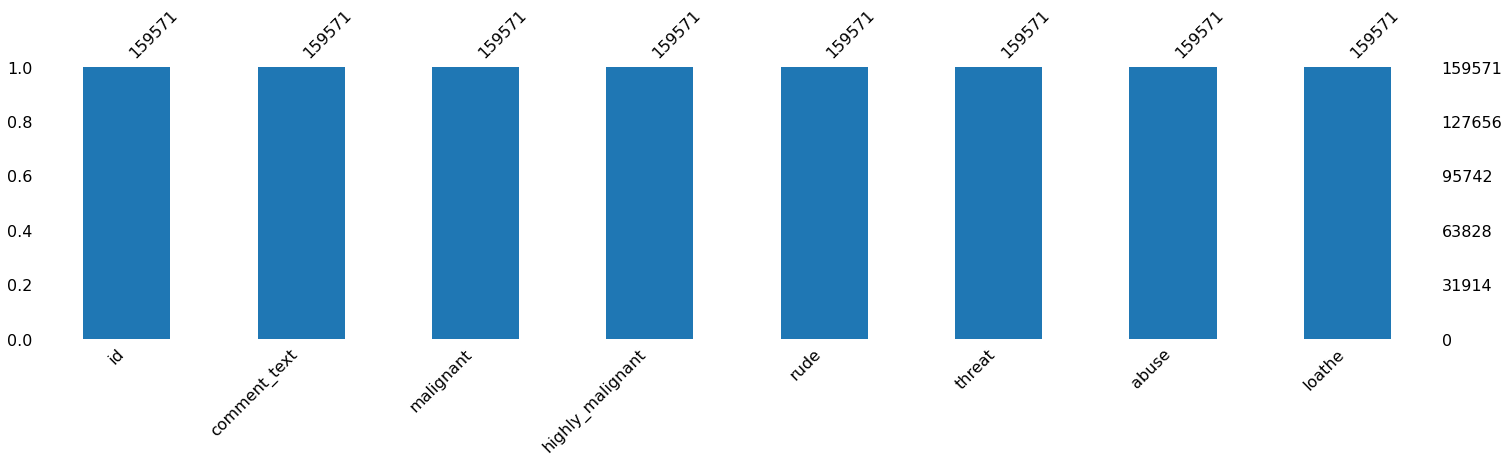

In [211]:
# checking the missing value in visual graph using missingno.

missingno.bar(df_train, figsize = (25,5), color="tab:blue")

As we can that there is no missing values in the train dataset

In [212]:
# checking info of train dataset

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


We can validate the non null count details as well as the datatype information using the info method. We have a total of 8 columns, two of which are of object datatype and the other six are of integer datatype.

In [213]:
#Checking ratio of data which contains malignant comments and normal or unoffensive comments.
output_labels = df_train.columns[2:]

#Counting non-zero rows i.e. Malignant Comments
malignant_comments = len(df_train[df_train[output_labels].any(axis=1)])

#Counting rows containing zero i.e. Normal Comments
normal_comments = len(df_train)-malignant_comments

print(f"Total Malignant Comments: {malignant_comments} ({round(malignant_comments*100/len(df_train),2)}%)")
print(f"Total Normal Comments: {normal_comments} ({round(normal_comments*100/len(df_train),2)}%)")

Total Malignant Comments: 16225 (10.17%)
Total Normal Comments: 143346 (89.83%)


Our dataframe contains 10.17 percent Malignant Comments and 89.83 percent Normal Comments, as seen in the above ratio. As a result, it is evident that the dataset is unbalanced and that the train test split of model training should be handled properly.

In [214]:
#Checking the length of comments and storing it into another column 'original_length'
#Copying df_train into another object df
df = df_train.copy()
df['original_length'] = df.comment_text.str.len()

In [215]:
#Checking the first five and last five rows here
df

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,original_length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67
...,...,...,...,...,...,...,...,...,...
159566,ffe987279560d7ff,""":::::And for the second time of asking, when ...",0,0,0,0,0,0,295
159567,ffea4adeee384e90,You should be ashamed of yourself \n\nThat is ...,0,0,0,0,0,0,99
159568,ffee36eab5c267c9,"Spitzer \n\nUmm, theres no actual article for ...",0,0,0,0,0,0,81
159569,fff125370e4aaaf3,And it looks like it was actually you who put ...,0,0,0,0,0,0,116


I've created a new column to keep track of the initial length of our comment text column.

### Data Cleansing

In [216]:
#As the feature 'id' has no relevance w.r.t. model training I am dropping this column
df.drop(columns=['id'],inplace=True)

#Converting comment text to lowercase format
df['comment_text'] = df.comment_text.str.lower()
df.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,original_length
0,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0,264
1,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0,112
2,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0,233
3,"""\nmore\ni can't make any real suggestions on ...",0,0,0,0,0,0,622
4,"you, sir, are my hero. any chance you remember...",0,0,0,0,0,0,67


I removed the "id" column because it was no longer needed, and I transformed all of the text data in our comment text column to lowercase for easy reading.

In [217]:
#Removing and Replacing unwanted characters in the comment_text column

#Replacing '\n' with ' '
df.comment_text = df.comment_text.str.replace('\n',' ')

#Keeping only text with letters a to z, 0 to 9 and words like can't, don't, couldn't etc
df.comment_text = df.comment_text.apply(lambda x: ' '.join(regexp_tokenize(x,"[a-z']+")))

#Removing Stop Words and Punctuations

#Getting the list of stop words of english language as set
stop_words = set(stopwords.words('english'))

#Updating the stop_words set by adding letters from a to z
for ch in range(ord('a'),ord('z')+1):
    stop_words.update(chr(ch))
    
#Updating stop_words further by adding some custom words
custom_words = ("d'aww","mr","hmm","umm","also","maybe","that's","he's","she's","i'll","he'll","she'll","us",
                "ok","there's","hey","heh","hi","oh","bbq","i'm","i've","nt","can't","could","ur","re","ve",
                "rofl","lol","stfu","lmk","ily","yolo","smh","lmfao","nvm","ikr","ofc","omg","ilu")
stop_words.update(custom_words)

#Checking the new list of stop words
print("New list of custom stop words are as follows:\n\n")
print(stop_words)

New list of custom stop words are as follows:


{'each', 'c', 'an', "wasn't", 'x', 'also', 'during', 'g', 'lol', 'll', 'l', 'above', 'doing', 'just', "she's", "mightn't", 'for', "shouldn't", 'ur', 'yours', 'once', "doesn't", 'weren', "won't", 'maybe', 'u', 'hmm', 'then', 'more', 'same', 'before', "you're", "didn't", 'or', 'what', 'but', 's', "i'm", 'h', 'those', 'his', 'have', 'having', 'of', 'heh', 'haven', 'him', 'not', 'been', 'has', 'there', "wouldn't", 'y', 'my', 'a', 'few', "aren't", 'the', 'she', 'some', 'n', 'us', 'q', 'here', 'z', 'our', "i've", 'am', "d'aww", "mustn't", "haven't", 'why', 'doesn', 'if', 'again', 'which', 'shan', 'hasn', "hasn't", 'can', 'had', 'is', 'after', 'at', 'needn', 'mightn', 'o', "can't", 'they', 'does', 'hadn', 'hers', 'itself', 'isn', 'ok', 'below', 'are', 'smh', 'lmfao', 'whom', 'won', 'so', 'this', 'other', 'being', 'with', 'bbq', 'where', 'didn', 'between', 'now', 'these', 'were', 'very', 'you', 'own', "you've", 'it', "it's", 'b', 'oh', 'its', 'ar

In [218]:
#Removing stop words
df.comment_text = df.comment_text.apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words).strip())

#Removing punctuations
df.comment_text = df.comment_text.str.replace("[^\w\d\s]","")


In [219]:
#Checking any 10 random rows to see the applied changes.
df.sample(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,original_length
126619,kasaalan wp notable addresses question whether...,0,0,0,0,0,0,607
73932,link added english cuisine considered advertis...,0,0,0,0,0,0,144
113145,added feature question back list,0,0,0,0,0,0,52
120329,month long block even two three perma blocked ...,0,0,0,0,0,0,250
83122,added wee bit british working hunters link bri...,0,0,0,0,0,0,325
24578,tried exactly done deleted wikipedia mess come...,0,0,0,0,0,0,155
14009,family background information family background,0,0,0,0,0,0,64
50139,please stop continue vandalize wikipedia raymo...,0,0,0,0,0,0,109
105057,yugoslav wars deleted yugoslav wars mention sl...,0,0,0,0,0,0,429
30954,get talk page smelling wog,1,0,1,0,1,0,38


In [220]:
#Checking the length of comment_text after cleaning and storing it in cleaned_length variable.
df["cleaned_length"] = df.comment_text.str.len()

In [221]:
#Taking a loot at first 10 rows of data
df.head(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,original_length,cleaned_length
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,158
1,matches background colour seemingly stuck than...,0,0,0,0,0,0,112,65
2,man really trying edit war guy constantly remo...,0,0,0,0,0,0,233,137
3,make real suggestions improvement wondered sec...,0,0,0,0,0,0,622,374
4,sir hero chance remember page,0,0,0,0,0,0,67,29
5,congratulations well use tools well talk,0,0,0,0,0,0,65,40
6,cocksucker piss around work,1,1,1,0,1,0,44,27
7,vandalism matt shirvington article reverted pl...,0,0,0,0,0,0,115,57
8,sorry word nonsense offensive anyway intending...,0,0,0,0,0,0,472,279
9,alignment subject contrary dulithgow,0,0,0,0,0,0,70,36


In [222]:
#Now checking the percentage of length cleaned.
print(f"Total Original Length        : {df.original_length.sum()}")
print(f"Total Cleaned Length         : {df.cleaned_length.sum()}")
print(f"Percentage of Length Cleaned : {(df.original_length.sum()-df.cleaned_length.sum())*100/df.original_length.sum()}%")


Total Original Length        : 62893130
Total Cleaned Length         : 39125213
Percentage of Length Cleaned : 37.790959044334414%


## Visualization

In [223]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

pandas-profiling is an open source Python module that allows us to perform exploratory data analysis in a matter of minutes with just a few lines of code. It creates interactive online reports that may be delivered to anybody, even if they have no programming experience. It also provides report production for the dataset, with a variety of features and customizations. In other words, pandas-profiling saves us the time and effort of seeing and comprehending each variable's distribution. It creates a report with all of the data in one place.

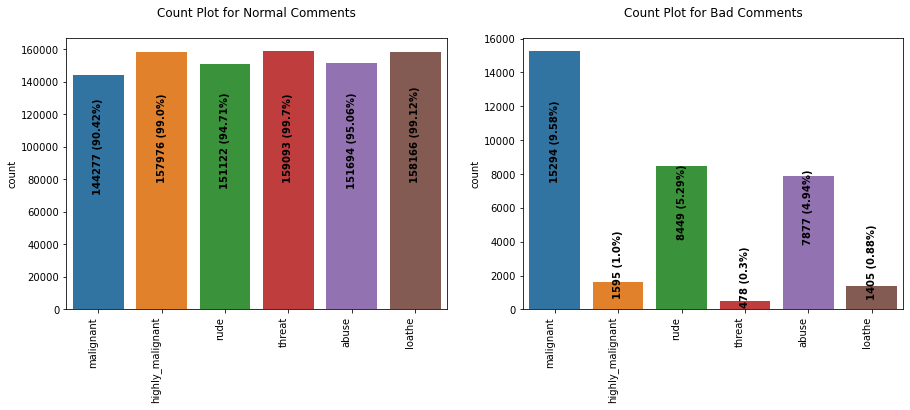

In [224]:
#Comparing normal comments and bad comments using count plot.

fig, ax = plt.subplots(1,2,figsize=(15,5))

for i in range(2):
    sns.countplot(data=df[output_labels][df[output_labels]==i], ax=ax[i])
    if i == 0:
        ax[i].set_title("Count Plot for Normal Comments\n")
    else:
        ax[i].set_title("Count Plot for Bad Comments\n")
        
    ax[i].set_xticklabels(output_labels, rotation=90, ha="right")
    p=0
    for prop in ax[i].patches:
        count = prop.get_height()
        s = f"{count} ({round(count*100/len(df),2)}%)"
        ax[i].text(p,count/2,s,rotation=90, ha="center", fontweight="bold")
        p += 1

        
plt.show()

#### Observations :

- The number of Normal Comments in the dataset is higher than the number of Bad or Malignant Comments. As a result, it is evident that the dataset is unbalanced and must be treated as such.

- The majority of the negative remarks are of the type malignant, with the least amount of type threat in the dataset.

- The majority of negative remarks are of the nasty, unpleasant, and abusive variety.

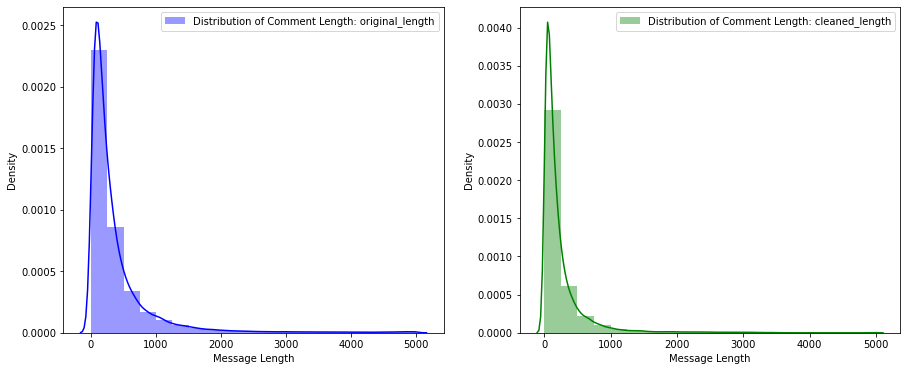

In [225]:
#Comparing the comment text length distribution before cleaning and after cleaning.

fig, ax = plt.subplots(1,2,figsize=(15,6))
j=0
colors = ['blue','green']
for i in df.columns[-2:]:
    label_text = f"Distribution of Comment Length: {i}"
    sns.distplot(df[i],ax=ax[j],bins=20,color=colors[j],label=label_text)
    ax[j].set_xlabel("Message Length")
    ax[j].legend()
    j += 1
    
    
plt.show()

#### Observation :

- Before cleaning the comment text column, the length of most comments ranged from 0 to 1100, but after cleaning it was decreased to 0 to 900.

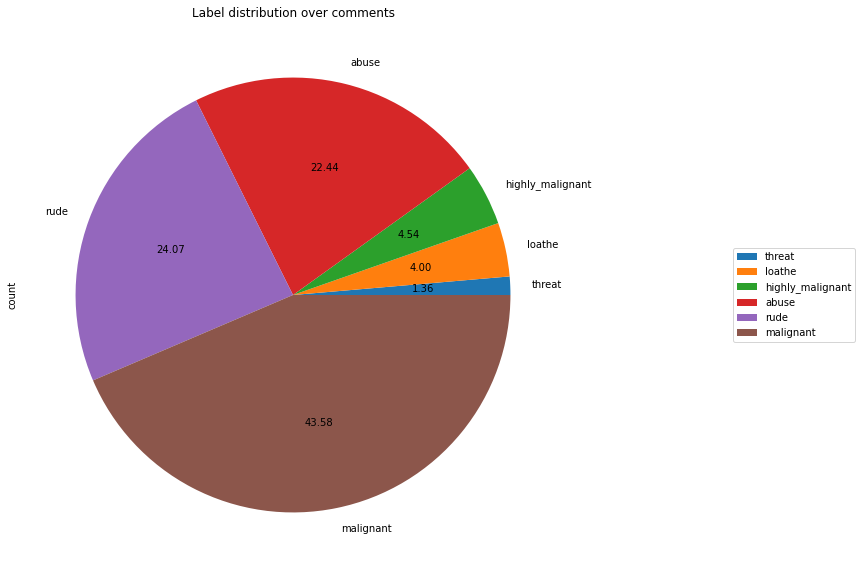

In [226]:
#Visualizing the label distribution of comments using pie chart.

comments_labels = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']
df_distribution = df_train[comments_labels].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y = 'count', title = 'Label distribution over comments', autopct='%.2f', figsize = (15, 10))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

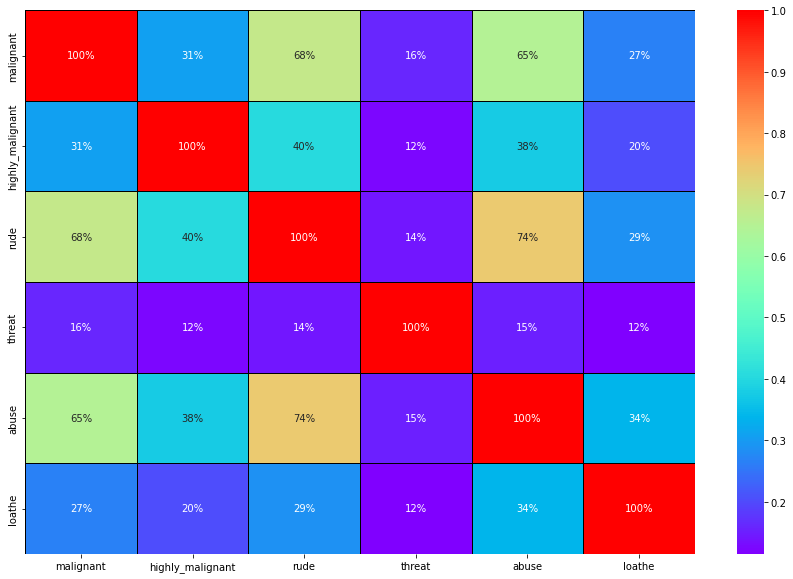

In [227]:
#Plotting heatmap for visualizing the correlation

plt.figure(figsize=(15, 10))
corr = df_train.corr() # corr() function provides the correlation value of each column
sns.heatmap(corr, linewidth=0.5, linecolor='black', fmt='.0%', cmap='rainbow', annot=True)

plt.show()

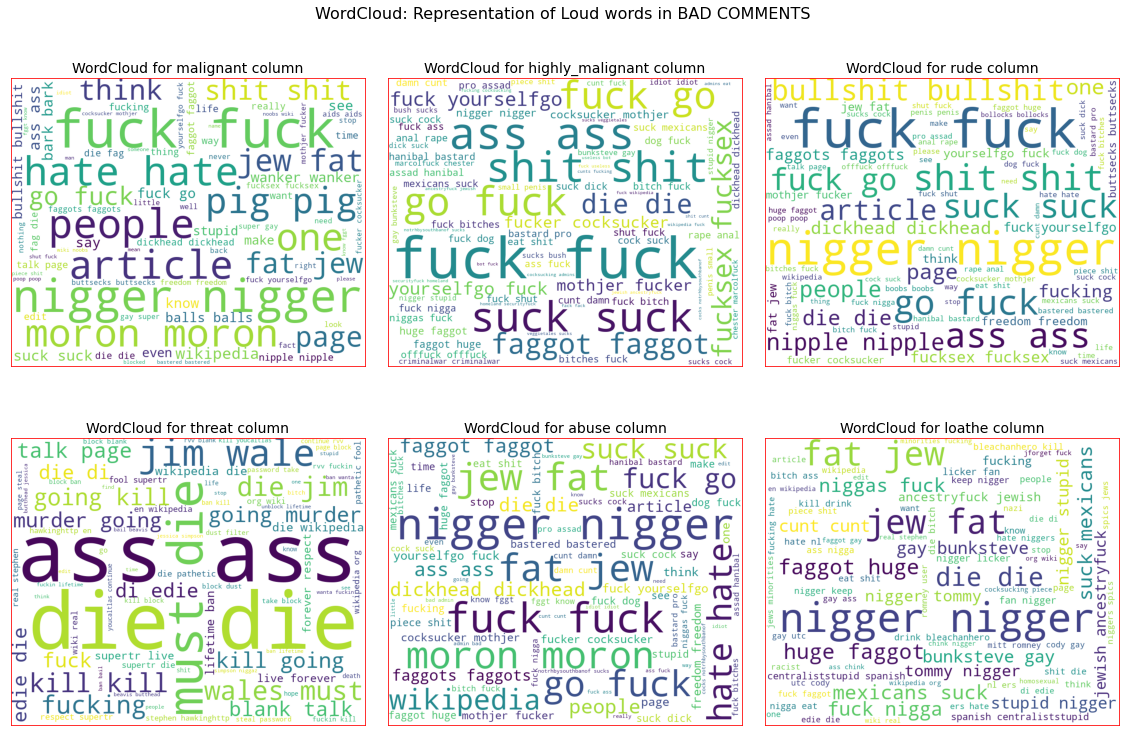

In [228]:
#WordCloud: Getting sense of loud words in each of the output labels

cols = 3
rows = len(output_labels)//cols
if len(output_labels) % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(16,rows*cols*1.8))
fig.subplots_adjust(top=0.8, hspace=0.3)

p=1
for i in output_labels:
    word_cloud = WordCloud(height=650, width=800,
                           background_color="white",max_words=80).generate(' '.join(df.comment_text[df[i]==1]))
    ax = fig.add_subplot(rows,cols,p)
    ax.imshow(word_cloud)
    ax.set_title(f"WordCloud for {i} column",fontsize=14)
    for spine in ax.spines.values():
        spine.set_edgecolor('r')
       
    ax.set_xticks([])
    ax.set_yticks([])
    p += 1

fig.suptitle("WordCloud: Representation of Loud words in BAD COMMENTS",fontsize=16)
fig.tight_layout(pad=2)

plt.show()

#### Observations :

- It's evident from the wordcloud of `malignant comments` that it's largely made up of terms like fuck, nigger, moron, hate, suck, and so on.

- It's evident from the wordcloud of `highly malignant comments` that it's largely made up of terms like ass, fuck, bitch, shit, die, suck, faggot, and so on.

- The majority of the terms in the wordcloud of `rude comments` are nigger, ass, fuck, suck, bullshit, bitch, and so on.

- It is obvious from the wordcloud of `threat comments` that the majority of them contain terms like death, must die, kill, murder, and so on.

- It's evident from the wordcloud of `abuse comments` that it's largely made up of terms like moron, nigger, obese, jew, bitch, and so on.

- It's evident from the wordcloud of `loathe comments` that it's largely made up of terms like nigga, dumb, nigger, die, homosexual cunt, and so on.

## Data Preparation for Model Training and Testing

### 1. Convert text to Vectors

In [229]:
#Converting text to vectors using TfidfVectorizer
tfidf = TfidfVectorizer(max_features=4000)
features = tfidf.fit_transform(df.comment_text).toarray()

In [230]:
#Checking the shape of features
features.shape

(159571, 4000)

### 2. Seperating Input and Output Variables

In [231]:
#input variables
X = features

#output variables
Y = csr_matrix(df[output_labels]).toarray()

In [232]:
#Checking shapes of input and output variables to take care of data imbalance issue.
print("Input Variable Shape :", X.shape)
print("Output Variable Shape:", Y.shape)

Input Variable Shape : (159571, 4000)
Output Variable Shape: (159571, 6)


## Classification Machine Learning Model Building

### 3. Training and Testing Model on our train dataset

In [233]:
#Creating a function to train and test model

def build_models(models,x,y,test_size=0.33,random_state=42):
    # spliting train test data using train_test_split
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=test_size,random_state=random_state)
    
    # training models using BinaryRelevance of problem transform
    for i in tqdm.tqdm(models,desc="Building Models"):
        start_time = timeit.default_timer()
        
        sys.stdout.write("\n=======================================================================================\n")
        sys.stdout.write(f"Current Model in Progress: {i} ")
        sys.stdout.write("\n=======================================================================================\n")
        
        br_clf = BinaryRelevance(classifier=models[i]["name"],require_dense=[True,True])
        print("Training: ",br_clf)
        br_clf.fit(x_train,y_train)
        
        print("Testing: ")
        predict_y = br_clf.predict(x_test)
        
        ham_loss = hamming_loss(y_test,predict_y)
        sys.stdout.write(f"\n\tHamming Loss  : {ham_loss}")
                
        ac_score = accuracy_score(y_test,predict_y)
        sys.stdout.write(f"\n\tAccuracy Score: {ac_score}")
        
        cl_report = classification_report(y_test,predict_y)
        sys.stdout.write(f"\n{cl_report}")
        
        end_time = timeit.default_timer()
        sys.stdout.write(f"Completed in [{end_time-start_time} sec.]")
        
        models[i]["trained"] = br_clf
        models[i]["hamming_loss"] = ham_loss
        models[i]["accuracy_score"] = ac_score
        models[i]["classification_report"] = cl_report
        models[i]["predict_y"] = predict_y
        models[i]["time_taken"] = end_time - start_time
                      
        sys.stdout.write("\n=======================================================================================\n")
    
    models["x_train"] = x_train
    models["y_train"] = y_train
    models["x_test"] = x_test
    models["y_test"] = y_test
    
    return models


In [234]:
#Preparing the list of models for classification purpose.

models = {"GaussianNB": {"name": GaussianNB()},
          "MultinomialNB": {"name": MultinomialNB()},
          "Logistic Regression": {"name": LogisticRegression()},
          "Random Forest Classifier": {"name": RandomForestClassifier()},
          "Support Vector Classifier": {"name": LinearSVC(max_iter = 3000)},
          "Ada Boost Classifier": {"name": AdaBoostClassifier()},
          "K Nearest Neighbors Classifier": {"name": KNeighborsClassifier()},
          "Decision Tree Classifier": {"name": DecisionTreeClassifier()},
          "Bagging Classifier": {"name": BaggingClassifier(base_estimator=LinearSVC())},
         }

#Taking one forth of the total data for training and testing purpose.

half = len(df)//4
trained_models = build_models(models,X[:half,:],Y[:half,:])

Building Models:   0%|          | 0/9 [00:00<?, ?it/s]


Current Model in Progress: GaussianNB 
Training:  BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
Testing: 

	Hamming Loss  : 0.18968223825800734
	Accuracy Score: 0.5210786175465248
              precision    recall  f1-score   support

           0       0.18      0.80      0.30      1281
           1       0.08      0.47      0.14       150
           2       0.12      0.72      0.21       724
           3       0.02      0.30      0.04        44
           4       0.12      0.67      0.20       650
           5       0.04      0.44      0.08       109

   micro avg       0.13      0.71      0.22      2958
   macro avg       0.09      0.57      0.16      2958
weighted avg       0.14      0.71      0.23      2958
 samples avg       0.05      0.07      0.06      2958
Completed in [17.472549541998887 sec.]

Current Model in Progress: MultinomialNB 
Training:  BinaryRelevance(classifier=MultinomialNB(), require_dense=[True, True])
Testing: 

	Hamming Loss  : 0.02371

Testing: 

	Hamming Loss  : 0.021065957716166605
	Accuracy Score: 0.9102164830991265
              precision    recall  f1-score   support

           0       0.86      0.60      0.71      1281
           1       0.52      0.21      0.30       150
           2       0.90      0.63      0.74       724
           3       0.56      0.20      0.30        44
           4       0.76      0.50      0.60       650
           5       0.77      0.21      0.33       109

   micro avg       0.83      0.55      0.66      2958
   macro avg       0.73      0.39      0.50      2958
weighted avg       0.82      0.55      0.65      2958
 samples avg       0.06      0.05      0.05      2958
Completed in [184.99573837500066 sec.]


## Hyperparameter Tuning

In [235]:
#Choosing Linear Support Vector Classifier model.
fmod_param = {'estimator__penalty' : ['l1', 'l2'],
              'estimator__loss' : ['hinge', 'squared_hinge'],
              'estimator__multi_class' : ['ovr', 'crammer_singer'],
              'estimator__random_state' : [42, 72, 111]
             }

SVC = OneVsRestClassifier(LinearSVC())
GSCV = GridSearchCV(SVC, fmod_param, cv=3)

x_train,x_test,y_train,y_test = train_test_split(X[:half,:], Y[:half,:], test_size=0.30, random_state=42)
GSCV.fit(x_train,y_train)
GSCV.best_params_

{'estimator__loss': 'hinge',
 'estimator__multi_class': 'ovr',
 'estimator__penalty': 'l2',
 'estimator__random_state': 42}

After analysing all of the classification models, I chose `Linear Support Vector Classifier` as my best model, and I've written its parameters above using the sklearn website as a reference. For hyper parameter tweaking my best model, I'm using the Grid Search CV approach. I've given the Grid Search CV a list of factors I believe it should examine for the best results. So, out of all the options it used to train the model, the Grid Search CV has presented me with the optimal parameter list that I can use on my final model.

In [236]:
Final_Model = OneVsRestClassifier(LinearSVC(loss='hinge', multi_class='ovr', penalty='l2', random_state=42))
Classifier = Final_Model.fit(x_train, y_train)
fmod_pred = Final_Model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100

print("Accuracy score for the Best Model is:", fmod_acc)

h_loss = hamming_loss(y_test,fmod_pred)*100

print("Hamming loss for the Best Model is:", h_loss)

Accuracy score for the Best Model is: 91.40207219251337
Hamming loss for the Best Model is: 2.0401626559714794


The Hyper Parameter Tuning was successfully implemented on my Final Model, and I obtained the accuracy score for it.

## AUC ROC Curve for Final Model

In [237]:
n_classes = y_test.shape[1]

#Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], fmod_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

In [238]:
#Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), fmod_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

#Used to change the output figure size
plt.rcParams["figure.figsize"] = (10,8)

In [239]:
#First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

In [240]:
#Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

In [241]:
#Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

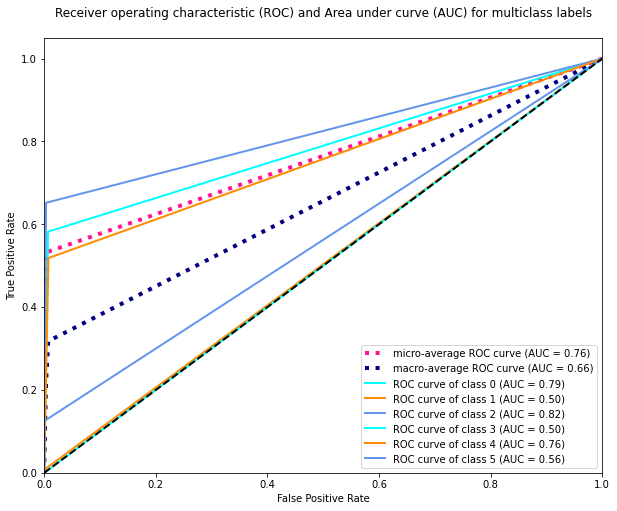

In [242]:
#Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (AUC = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (AUC = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=2,
        label="ROC curve of class {0} (AUC = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic (ROC) and Area under curve (AUC) for multiclass labels\n")
plt.legend(loc="lower right")
plt.show()

I've created a ROC Curve for my final model, which displays a different curve for each class in our multi-label target variable, as well as their AUC values.

## Confusion Matrix for Final Model

In [243]:
print("Confusion matrix:\n\n", multilabel_confusion_matrix(y_test, fmod_pred))

Confusion matrix:

 [[[10719    74]
  [  491   684]]

 [[11832     1]
  [  134     1]]

 [[11272    38]
  [  229   429]]

 [[11929     1]
  [   38     0]]

 [[11286    86]
  [  287   309]]

 [[11870     2]
  [   84    12]]]


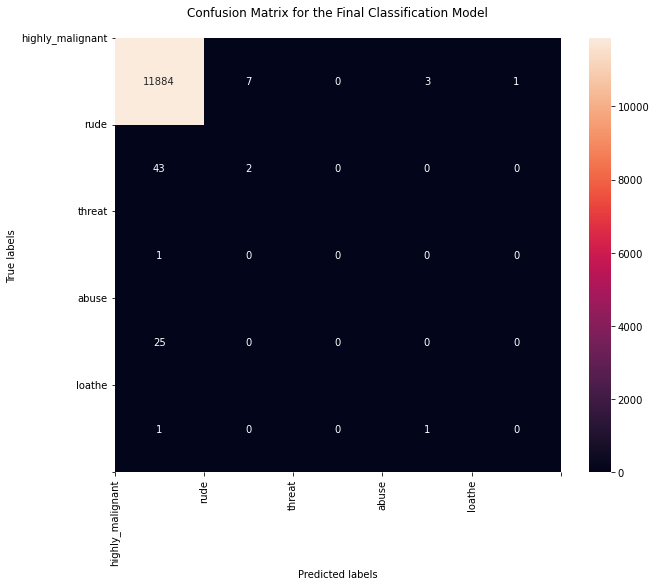

In [244]:
#Used to change the output figure size.
plt.rcParams["figure.figsize"] = (10,8)
ax= plt.subplot()
cm = confusion_matrix(np.asarray(y_test).argmax(axis=1), np.asarray(fmod_pred).argmax(axis=1))

#annot=True to annotate cells, ftm='g' to disable scientific notation.
sns.heatmap(cm, annot=True, fmt='g', ax=ax); 

#Title, labels and ticks
ax.set_title('Confusion Matrix for the Final Classification Model\n'); 
ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels'); 
loc = plticker.MultipleLocator()
ax.xaxis.set_major_locator(loc); ax.yaxis.set_major_locator(loc);
ax.set_xticklabels(comments_labels); ax.set_yticklabels(comments_labels);
plt.xticks(rotation=90); plt.yticks(rotation=0);
plt.show()

I can comprehend the number of times I obtained the proper outputs and the number of times my final model failed to produce the correct forecast using the aforesaid confusion matrix (depicting in the black boxes).

## Model Saving or Serialization

In [245]:
#selecting the best model
best_model = trained_models['Support Vector Classifier']['trained']

In [246]:
#saving the best classification model
joblib.dump(best_model,open('Malignant_comments_classifier.pkl','wb'))

To store the final classification model, I use the joblib option, although it may also be done using pickle.

## Preprocessing Pipeline for test dataframe

The following preprocessing pipeline is required to perform model prediction:

- Use the test dataset
- Remove null values if any
- Drop column id
- Convert comment text to lower case and replace '\n' with single space
- Keep only text data ie. a-z' and remove other data from comment text
- Remove stop words and punctuations
- Apply Stemming using SnowballStemmer
- Convert text to vectors using TfidfVectorizer
- Load saved or serialized best model
- Predict values and create a new CSV file

In [247]:
#Remove null values.
if df_test.isnull().sum()[1] != 0:
    df_test.dropna(inplace=True)

In [248]:
#Drop coulmn id.
df_test.drop(columns=['id'],inplace=True)

In [249]:
#Convert comment text to lower case and replace '\n' with single space.
df_test["comment_text"] = df_test.comment_text.str.lower()
df_test["comment_text"] = df_test.comment_text.str.replace('\n',' ')

In [250]:
#Keep only text data i.e., a-z' and remove other data from comment text.
df_test.comment_text = df_test.comment_text.apply(lambda x: ' '.join(regexp_tokenize(x,"[a-z']+")))

In [251]:
#Remove stopwords.
df_test.comment_text = df_test.comment_text.apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words).strip())

In [252]:
#Remove punctuations.
df_test.comment_text = df_test.comment_text.str.replace("[^\w\d\s]","")

In [253]:
#Convert text to vectors using TfidfVectorizer.
tfidf = TfidfVectorizer(analyzer = 'word', max_features=4000)
test_features = tfidf.fit_transform(df_test.comment_text).toarray()

In [254]:
#Load saved or serialized model and predict.
model_loaded = joblib.load('Malignant_comments_classifier.pkl')

In [255]:
#Make predictions and view the results.
predict_test = model_loaded.predict(test_features)

In [256]:
#Saving predicted values into a CSV file.
pd.DataFrame(predict_test.toarray()).to_csv('Predicted_test_output.csv')

In [257]:
df1 = pd.read_csv('Predicted_test_output.csv')
df1.drop("Unnamed: 0", axis=1, inplace=True)
df1.rename({'0':'malignant', '1':'highly_malignant', '2':'rude', '3':'threat', '4':'abuse', '5':'loathe'}, 
           axis='columns', inplace=True)

df2=df_test.copy()
df = pd.concat([df2, df1], axis=1)
df

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,yo bitch ja rule succesful ever whats hating s...,0,0,0,0,0,0
1,rfc title fine imo,0,0,0,0,0,0
2,sources zawe ashton lapland,0,0,0,0,0,0
3,look back source information updated correct f...,0,0,0,0,0,0
4,anonymously edit articles,0,0,0,0,0,0
...,...,...,...,...,...,...,...
153159,totally agree stuff nothing long crap,0,0,0,0,0,0
153160,throw field home plate get faster throwing cut...,0,0,0,0,0,0
153161,okinotorishima categories see changes agree co...,0,0,0,0,0,0
153162,one founding nations eu germany law return qui...,0,0,0,0,0,0


In [258]:
df.to_csv('test_dataset_predictions.csv', index=False)

## Inference

Starting with univariate analysis and using a count plot, it was discovered that the dataset is unbalanced, with more entries for normal comments than for poor remarks (including malignant, highly malignant, rude, threat, abuse and loathe). Furthermore, using a distribution plot for comment length, it was discovered that after cleaning, the majority of comments lengths reduce from 0-1100 to 0-900. Moving on with the wordcloud, it was discovered that malignant comments contain terms such as fuck, nigger, moron, hatred, suck, and so on. Words like ass, fuck, bitch, shit, die, suck, faggot, and others appear often in highly malignant remarks. Words like nigger, ass, fuck, suck, crap, bitch, and others are used in nasty statements. Words like death, must die, kill, murder, and others are used in threat statements.Words like stupid, nigger, obese, jew, bitch, and others are used in abusive comments. and despise remarks include phrases such as nigga, dumb, nigger, die, gay, cunt, and so on.

### Problems faced while working in this project:

- Because it took more than 2 hours, extra computer power was necessary.
- The dataset is unbalanced, and the comment messages are poorly written.
- Because time was used more, good parameters could not be acquired through hyper-parameter tweaking.

### Areas of improvement:

- Could be given a solid dataset that doesn't take too long.
- Time complexity is reduced.
- Creating a well-balanced dataset with fewer mistakes.

My project's conclusion is that we should use good, courteous language on social media and avoid using abusive, vulgar, and derogatory terms. It has the potential to produce a slew of issues that will have an impact on our life. When dealing with tension and negativity, try to be courteous, cool, and collected one of the greatest solutions is to ignore it and overcome it in a constructive way.